In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


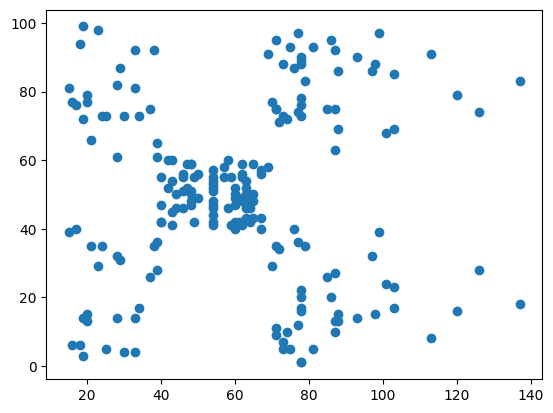

In [2]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [5]:
k_range = range(1,10)
SSE = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    SSE.append(km.inertia_)

SSE

[269981.28,
 183499.07470288628,
 132485.38056680158,
 73679.78903948836,
 44448.45544793371,
 37564.94305477131,
 31573.960664122747,
 30038.05516421984,
 23302.328390848128]

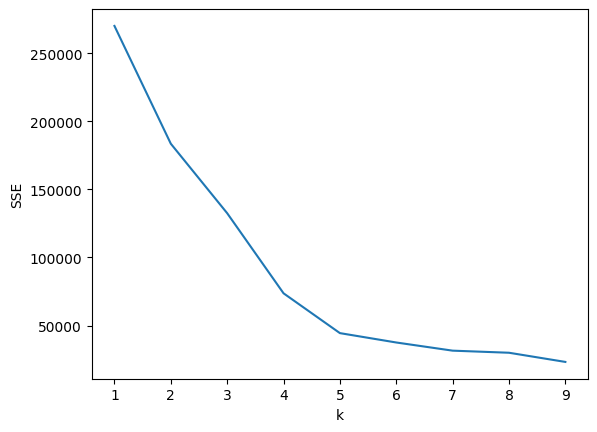

In [6]:
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_range,SSE)

In [9]:
km = KMeans(n_clusters=5)
cluster_pred = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])


In [10]:
df['Clusters'] = cluster_pred
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


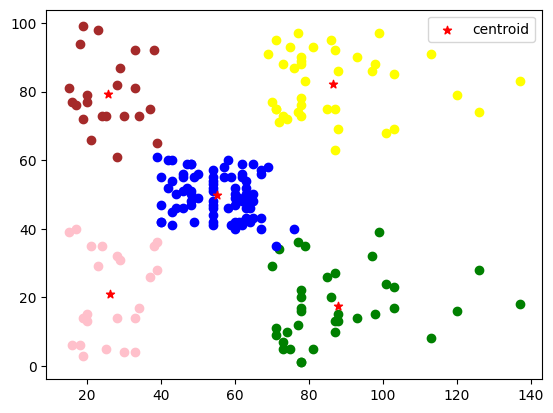

In [11]:
df1 = df[df.Clusters==0]
df2 = df[df.Clusters==1]
df3 = df[df.Clusters==2]
df4 = df[df.Clusters==3]
df5 = df[df.Clusters==4]

plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='brown')
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='yellow')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='blue')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='pink')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='*',label='centroid')
plt.legend()